In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Set constants
DATA_DIR = 'Data'  # Path to your 'real' and 'fake' image folder
IMAGE_SIZE = 224  # Adjust if necessary
BATCH_SIZE = 32
EPOCHS = 50

# Data preparation with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2  # 20% of the data will be used for validation
)

data_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'  # This will be used for training
)

validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # This will be used for validation
)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [10]:
# Load ResNet50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze base layers (ResNet50)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling
x = tf.keras.layers.Dense(64, activation='relu')(x)  # First dense layer
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)


In [13]:
# Define the model
model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train and evaluate the model
history = model.fit(
    data_generator,
    validation_data=validation_generator,
    epochs=EPOCHS
)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - accuracy: 0.6144 - loss: 0.6623 - val_accuracy: 0.5833 - val_loss: 0.6830
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 226ms/step - accuracy: 0.6304 - loss: 0.6646 - val_accuracy: 0.5950 - val_loss: 0.6785
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.6059 - loss: 0.6643 - val_accuracy: 0.5633 - val_loss: 0.6764
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.6053 - loss: 0.6663 - val_accuracy: 0.5833 - val_loss: 0.6753
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.6022 - loss: 0.6707 - val_accuracy: 0.5867 - val_loss: 0.6703
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - accuracy: 0.6239 - loss: 0.6591 - val_accuracy: 0.5900 - val_loss: 0.6712
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - accuracy: 0.6084 - loss: 0.6576 - val_accuracy: 0.5800 - val_loss: 0.6744
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.6332 - loss: 0.6565 - val_accu

In [15]:
model.save("real_ai_classifier.keras")

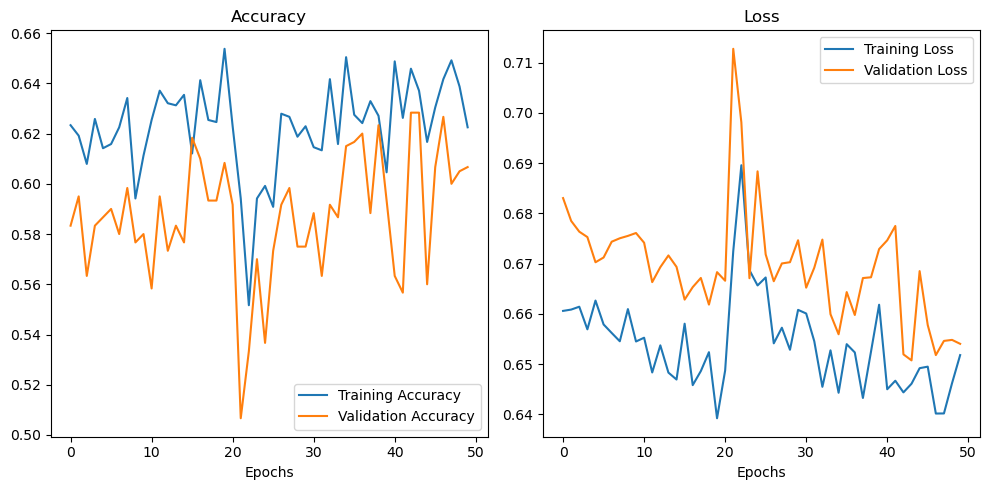

In [17]:
# Plot training and validation accuracy/loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()